# Car Price Prediction



### Life Cycle of ML Project
- Understanding the problem
- Data Collection
- Data Checks to perform 
- Exploratory data analysis
- Data Pre-processing

## 1) Problem Statement
- This project understands how the Car's Price is affected by other variables such as amount, cc_type, kms_driven. 

## 2) Data Collection
Dataset got scraped form - https://www.cars24.com/


Dataset consists of 11-columns : 

 - Year	
 - Company
 - Model
 - Transmission
 - Engine_Type
 - Kms_Driven
 - ownership
 - Fuel_Type
 - Passing	
 - Area	
 - Price


Data consists of approx 8k rows 

### 2.1 Import Data and required packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the csv data as DataFrame

In [2]:
df = pd.read_csv('../data/Cars_24.csv')

In [3]:
df

,Year,Company,Model,Transmission,Engine_Type,Kms_Driven,ownership,Fuel_Type,Passing,Area,Price
0,2017,Maruti,Ertiga,Manual,VDI SHVS,"1,01,647 km",3rd Owner,Diesel,GJ-01,Ahmedabad,"7,16,000"
1,2018,Maruti,Dzire,Manual,VXI,"30,303 km",1st Owner,Petrol,KA-03,Bengaluru,"5,57,000"
2,2014,Maruti,Celerio,Automatic,VXI AMT,"27,939 km",1st Owner,Petrol,MH-02,Pune,"3,76,000"
3,2016,Maruti,Swift Dzire,Manual,ZXI,"82,298 km",1st Owner,Petrol,DL-4C,Noida,"4,82,000"
4,2011,Maruti,Swift,Manual,ZXI,"61,896 km",1st Owner,Petrol,DL-12,Noida,"3,12,000"
...,...,...,...,...,...,...,...,...,...,...,...
8042,2020,Jeep,Compass,Automatic,1.4 LIMITED PLUS AT,"52,332 km",1st Owner,Petrol,MH-48,Pune,"17,15,000"
8043,2020,MG,HECTOR PLUS,Automatic,SHARP DCT,"59,688 km",1st Owner,Petrol,TS-09,Hyderabad,"16,90,000"
8044,2019,MG,HECTOR,Manual,SHARP 2.0 DIESEL,"56,561 km",1st Owner,Diesel,TS-07,Hyderabad,"16,15,000"
8045,2019,MG,HECTOR,Manual,SUPER DIESEL,"24,618 km",1st Owner,Diesel,GJ-05,Surat,"13,08,000"


In [4]:
df.sample(5)

,Year,Company,Model,Transmission,Engine_Type,Kms_Driven,ownership,Fuel_Type,Passing,Area,Price
7268,2016,Ford,Ecosport,Automatic,TITANIUM 1.5L PETROL AT,"18,965 km",1st Owner,Petrol,KA-01,Bengaluru,"7,77,000"
2565,2017,Maruti,Baleno,Manual,DELTA PETROL 1.2,"63,013 km",1st Owner,Petrol,TN-19,Chennai,"6,06,000"
6724,2020,Tata,NEXON,Manual,XZ PLUS (O) PETROL DUAL TONE,"31,011 km",1st Owner,Petrol,BR-06,Patna,"9,07,000"
7470,2021,Toyota,YARIS,Manual,J MT,"8,584 km",1st Owner,Petrol,DL-10,New Delhi,"8,98,000"
100,2016,Maruti,Swift,Manual,VXI O,"60,380 km",1st Owner,Petrol,KL-47,Kochi,"5,87,000"


In [5]:
df.shape

(8047, 11)

### 2.2 Dataset Information

- Company
- Model 
- Engine_Type
- Transmission --------> Gear Transmission (Auto / Manual)
- Year  -------------> Year of purchasing
- Kms_Driven   ------> Total kile meters used
- Fuel_Type ----> Petrol / Electric
- Area	 -----------> Place of Buying/Selling
- Passing ---------> State of registration
- Ownership ---> First hand / Second hand / Thrid Hand / Fourth hand 
- Price -----------> Output variable (cost of the car)

## 3) Data checks to perform

- Check missing values
- Check Duplicates
- Check Data Types
- Check the number of unique values of each column
- Check Statistics of data set
- Check Various categoreis present in the different categorical columns

### 3.1 Check missing values

In [6]:
df.isna().sum()

Year            0
Company         0
Model           0
Transmission    0
Engine_Type     0
Kms_Driven      0
ownership       0
Fuel_Type       0
Passing         0
Area            0
Price           0
dtype: int64

No null values present

### 3.2 Check duplicates

In [7]:
df.duplicated().sum()

0

No duplicates present

### 3.3 Check for data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          8047 non-null   int64 
 1   Company       8047 non-null   object
 2   Model         8047 non-null   object
 3   Transmission  8047 non-null   object
 4   Engine_Type   8047 non-null   object
 5   Kms_Driven    8047 non-null   object
 6   ownership     8047 non-null   object
 7   Fuel_Type     8047 non-null   object
 8   Passing       8047 non-null   object
 9   Area          8047 non-null   object
 10  Price         8047 non-null   object
dtypes: int64(1), object(10)
memory usage: 691.7+ KB


In [9]:
df.Kms_Driven.sample(20)

7331      35,133 km
7238      54,308 km
4935      30,105 km
1033      89,183 km
7941      22,542 km
2309      38,655 km
7591    1,07,080 km
6871      24,355 km
6431      11,244 km
1429      14,485 km
5303    1,05,397 km
3976      26,772 km
389       42,611 km
1334      38,673 km
1698      41,107 km
1894      18,367 km
1517      52,783 km
2200      72,393 km
7895      95,301 km
3165      21,336 km
Name: Kms_Driven, dtype: object

In [10]:
def chng_num_to_int(string):
    if 'km' in string:
        string = string.replace('km', '')
    if ',' in string:
        string = string.replace(',', '')
        return int(string)
    return string

In [11]:
df['Kms_Driven'] = df.apply(lambda row : chng_num_to_int(row['Kms_Driven']), axis = 1)
df['Kms_Driven'] = df['Kms_Driven'].astype('int')

In [12]:
df['Price'] = df.apply(lambda row : chng_num_to_int(row['Price']), axis = 1)
df['Price'] = df['Price'].astype('int')

In [13]:
df.Kms_Driven.sample(5)

2573    31638
350     22783
7577    39093
2956    18047
7570    68942
Name: Kms_Driven, dtype: int64

### 3.4 Checking the number of unique values of each column

In [14]:
df.nunique()

Year              13
Company           16
Model            126
Transmission       2
Engine_Type     1146
Kms_Driven      7747
ownership          4
Fuel_Type          4
Passing          444
Area              28
Price           1379
dtype: int64

In [15]:
df.drop(columns=['Engine_Type'], inplace= True)

In [16]:
np.sort(df.Year.unique())

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022])

In [17]:
np.sort(df.Company.unique())

array(['BMW', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jeep', 'KIA', 'MG',
       'Mahindra', 'Maruti', 'Nissan', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen'], dtype=object)

In [18]:
np.sort(df.Model.unique())

array(['3 Series', 'A Star', 'ALCAZAR', 'ALTROZ', 'AURA', 'Accord',
       'Alto', 'Alto 800', 'Alto K10', 'Amaze', 'Ameo', 'BOLERO NEO',
       'BR-V', 'BREZZA', 'Baleno', 'Bolero', 'Bolt', 'Brio', 'CARENS',
       'CRV', 'Camry', 'Captur', 'Celerio', 'Celerio X', 'Ciaz', 'City',
       'Civic', 'Compass', 'Corolla Altis', 'Creta', 'Duster', 'Dzire',
       'Ecosport', 'Eeco', 'Elite i20', 'Endeavour', 'Eon', 'Ertiga',
       'Etios', 'Etios Liva', 'FREESTYLE', 'Figo Aspire', 'Fortuner',
       'GRAND CHEROKEE', 'GRAND I10 NIOS', 'Glanza', 'Go', 'Go Plus',
       'Grand i10', 'HECTOR', 'HECTOR PLUS', 'Harrier', 'Hexa', 'IGNIS',
       'Innova', 'Innova Crysta', 'Jazz', 'Jetta', 'KUSHAQ',
       'KUV 100 NXT', 'Kiger', 'Kuv100', 'Kwid', 'MAGNITE', 'MARAZZO',
       'Micra', 'Micra Active', 'NEW I20', 'NEW I20 N LINE', 'NEW SANTRO',
       'NEXON', 'New Elantra', 'New Figo', 'New Wagon-R', 'OMNI E',
       'Octavia', 'PUNCH', 'Polo', 'Pulse', 'Rapid', 'Redi Go', 'Ritz',
       'S Cross'

In [19]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [20]:
df.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG', 'LPG'], dtype=object)

In [21]:
df.loc[df['Fuel_Type']=='LPG']

,Year,Company,Model,Transmission,Kms_Driven,ownership,Fuel_Type,Passing,Area,Price
3663,2012,Hyundai,i10,Manual,51068,1st Owner,LPG,AP-11,Hyderabad,317000


In [22]:
df.drop(index=3663, inplace=True)

In [23]:
df.ownership.unique()

array(['3rd Owner', '1st Owner', '2nd Owner', '4th Owner'], dtype=object)

In [24]:
np.sort(df.Passing.unique())

array(['22-BH', 'AP-01', 'AP-07', 'AP-09', 'AP-10', 'AP-11', 'AP-13',
       'AP-21', 'AP-22', 'AP-23', 'AP-28', 'AP-29', 'AP-30', 'AP-39',
       'BR-01', 'BR-02', 'BR-06', 'BR-09', 'BR-31', 'CH-01', 'DL-10',
       'DL-11', 'DL-12', 'DL-13', 'DL-14', 'DL-1C', 'DL-2C', 'DL-3C',
       'DL-4C', 'DL-5C', 'DL-6C', 'DL-7C', 'DL-8C', 'DL-9C', 'GJ-01',
       'GJ-02', 'GJ-03', 'GJ-04', 'GJ-05', 'GJ-06', 'GJ-07', 'GJ-08',
       'GJ-09', 'GJ-10', 'GJ-12', 'GJ-13', 'GJ-14', 'GJ-15', 'GJ-16',
       'GJ-17', 'GJ-18', 'GJ-19', 'GJ-21', 'GJ-22', 'GJ-23', 'GJ-24',
       'GJ-26', 'GJ-27', 'GJ-30', 'GJ-31', 'GJ-32', 'GJ-34', 'GJ-35',
       'GJ-36', 'GJ-38', 'HR-01', 'HR-02', 'HR-03', 'HR-05', 'HR-06',
       'HR-07', 'HR-10', 'HR-11', 'HR-12', 'HR-13', 'HR-14', 'HR-16',
       'HR-19', 'HR-20', 'HR-21', 'HR-22', 'HR-23', 'HR-24', 'HR-26',
       'HR-27', 'HR-29', 'HR-30', 'HR-31', 'HR-34', 'HR-35', 'HR-36',
       'HR-49', 'HR-50', 'HR-51', 'HR-52', 'HR-70', 'HR-72', 'HR-76',
       'HR-77', 'HR-

In [35]:
df.Area.unique()

array([' Ahmedabad', ' Bengaluru', ' Pune', ' Noida', ' Chennai',
       ' Patna', ' Kolkata', ' Chandigarh', 'Mansarovar', ' Surat',
       ' New Delhi', ' Jaipur', ' Lasudia Mori', ' Mumbai', ' Gurugram',
       ' Nasik', ' Ludhiana', ' Rajkot', ' Faridabad', ' Coimbatore',
       ' Ghaziabad', ' Hyderabad', ' Kochi', ' Lucknow', ' Benga...',
       ' Nagpur', ' Rohtak', ' Navi Mumbai'], dtype=object)

In [40]:
df.loc[:,'Area'] = df.apply(lambda row : row['Area'].lstrip(), axis = 1)

In [41]:
df.Area.unique()

array(['Ahmedabad', 'Bengaluru', 'Pune', 'Noida', 'Chennai', 'Patna',
       'Kolkata', 'Chandigarh', 'Mansarovar', 'Surat', 'New Delhi',
       'Jaipur', 'Lasudia Mori', 'Mumbai', 'Gurugram', 'Nasik',
       'Ludhiana', 'Rajkot', 'Faridabad', 'Coimbatore', 'Ghaziabad',
       'Hyderabad', 'Kochi', 'Lucknow', 'Benga...', 'Nagpur', 'Rohtak',
       'Navi Mumbai'], dtype=object)

In [43]:
df.loc[df.Area=='Benga...']

,Year,Company,Model,Transmission,Kms_Driven,ownership,Fuel_Type,Passing,Area,Price
57,2015,Maruti,Ertiga,Manual,31208,1st Owner,Petrol,KA-01,Benga...,794000
86,2012,Maruti,Swift Dzire,Manual,61036,1st Owner,Petrol,KA-04,Benga...,493000
326,2019,Maruti,Celerio,Manual,15356,1st Owner,Petrol,KA-01,Benga...,535000
451,2012,Maruti,Ertiga,Manual,98413,2nd Owner,Diesel,KA-51,Benga...,602000
540,2016,Maruti,Alto K10,Manual,65484,3rd Owner,Petrol,KA-50,Benga...,318000
...,...,...,...,...,...,...,...,...,...,...
7809,2016,Datsun,Redi Go,Manual,31663,2nd Owner,Petrol,KA-53,Benga...,253000
7867,2021,Skoda,Rapid,Automatic,29517,1st Owner,Petrol,KA-51,Benga...,1037000
7882,2022,Skoda,SLAVIA,Automatic,22496,1st Owner,Petrol,KA-09,Benga...,1514000
7885,2012,Skoda,Rapid,Manual,113536,3rd Owner,Diesel,KA-01,Benga...,327000


In [44]:
df.loc[df.Area=='Benga...', 'Area'] = 'Bengaluru'

In [45]:
df.loc[df.Area=='Benga...']

,Year,Company,Model,Transmission,Kms_Driven,ownership,Fuel_Type,Passing,Area,Price


In [46]:
df.nunique()

Year              13
Company           16
Model            126
Transmission       2
Kms_Driven      7746
ownership          4
Fuel_Type          3
Passing          444
Area              27
Price           1379
dtype: int64

In [47]:
print("Categories in 'Company' variable:    ", end=' ')
print(np.sort(df['Company'].unique()), end='\n\n\n')

print("Categories in 'Model' variable:    ", end=' ')
print(np.sort(df['Model'].unique()), end='\n\n\n')

print("Categories in 'Year' variable:    ", end=' ')
print(np.sort(df['Year'].unique()), end='\n\n')

print("Categories in 'Fuel_type' variable:    ", end=' ')
print(df['Fuel_Type'].unique(), end='\n\n\n')

print("Categories in 'Passing' variable:    ", end=' ')
print(np.sort(df['Passing'].unique()), end='\n\n\n')

print("Categories in 'Area' variable:    ", end=' ')
print(np.sort(df['Area'].unique()), end='\n\n\n')

print("Categories in 'Transmission' variable:    ", end=' ')
print(df['Transmission'].unique(), end='\n\n\n')

print("Categories in 'ownership' variable:    ", end=' ')
print(df['ownership'].unique(), end='\n\n\n')



Categories in 'Company' variable:     ['BMW' 'Datsun' 'Ford' 'Honda' 'Hyundai' 'Jeep' 'KIA' 'MG' 'Mahindra'
 'Maruti' 'Nissan' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen']


Categories in 'Model' variable:     ['3 Series' 'A Star' 'ALCAZAR' 'ALTROZ' 'AURA' 'Accord' 'Alto' 'Alto 800'
 'Alto K10' 'Amaze' 'Ameo' 'BOLERO NEO' 'BR-V' 'BREZZA' 'Baleno' 'Bolero'
 'Bolt' 'Brio' 'CARENS' 'CRV' 'Camry' 'Captur' 'Celerio' 'Celerio X'
 'Ciaz' 'City' 'Civic' 'Compass' 'Corolla Altis' 'Creta' 'Duster' 'Dzire'
 'Ecosport' 'Eeco' 'Elite i20' 'Endeavour' 'Eon' 'Ertiga' 'Etios'
 'Etios Liva' 'FREESTYLE' 'Figo Aspire' 'Fortuner' 'GRAND CHEROKEE'
 'GRAND I10 NIOS' 'Glanza' 'Go' 'Go Plus' 'Grand i10' 'HECTOR'
 'HECTOR PLUS' 'Harrier' 'Hexa' 'IGNIS' 'Innova' 'Innova Crysta' 'Jazz'
 'Jetta' 'KUSHAQ' 'KUV 100 NXT' 'Kiger' 'Kuv100' 'Kwid' 'MAGNITE'
 'MARAZZO' 'Micra' 'Micra Active' 'NEW I20' 'NEW I20 N LINE' 'NEW SANTRO'
 'NEXON' 'New Elantra' 'New Figo' 'New Wagon-R' 'OMNI E' 'Octavia' 'PUNCH'
 'Polo' 'Pul

### 3.5 Check statistics of dataset

In [48]:
df.describe()

,Year,Kms_Driven,Price
count,8046.000000,8046.000000,8.046000e+03
mean,2016.989436,52642.171017,5.746204e+05
std,2.861721,29178.063128,2.650021e+05
min,2010.000000,0.000000,1.190000e+05
25%,2015.000000,30729.000000,3.930000e+05
50%,2017.000000,50369.500000,5.340000e+05
75%,2019.000000,71820.750000,6.980000e+05
max,2022.000000,971212.000000,3.300000e+06


## 4) Exploring Data (Vizualization)

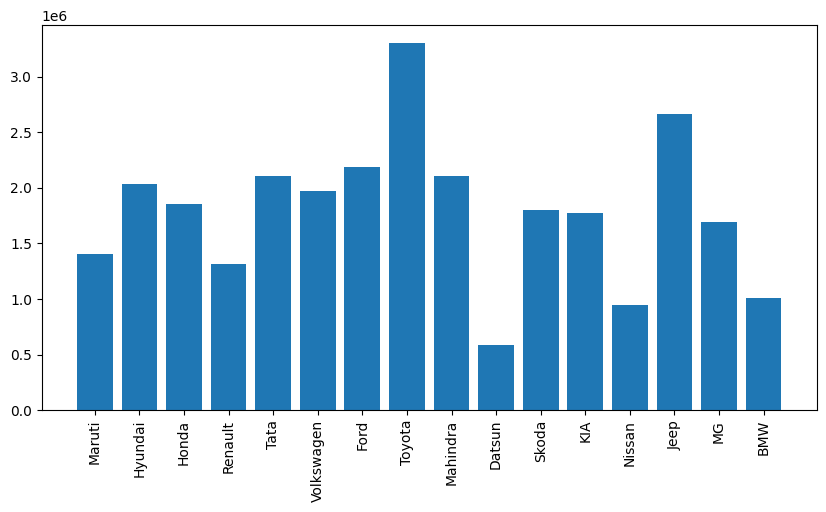

In [49]:
# fig, ax = plt.subplots()
plt.figure(figsize=(10,5))
plt.bar(df['Company'],df['Price'])
plt.xticks(rotation = 90) 
plt.show()

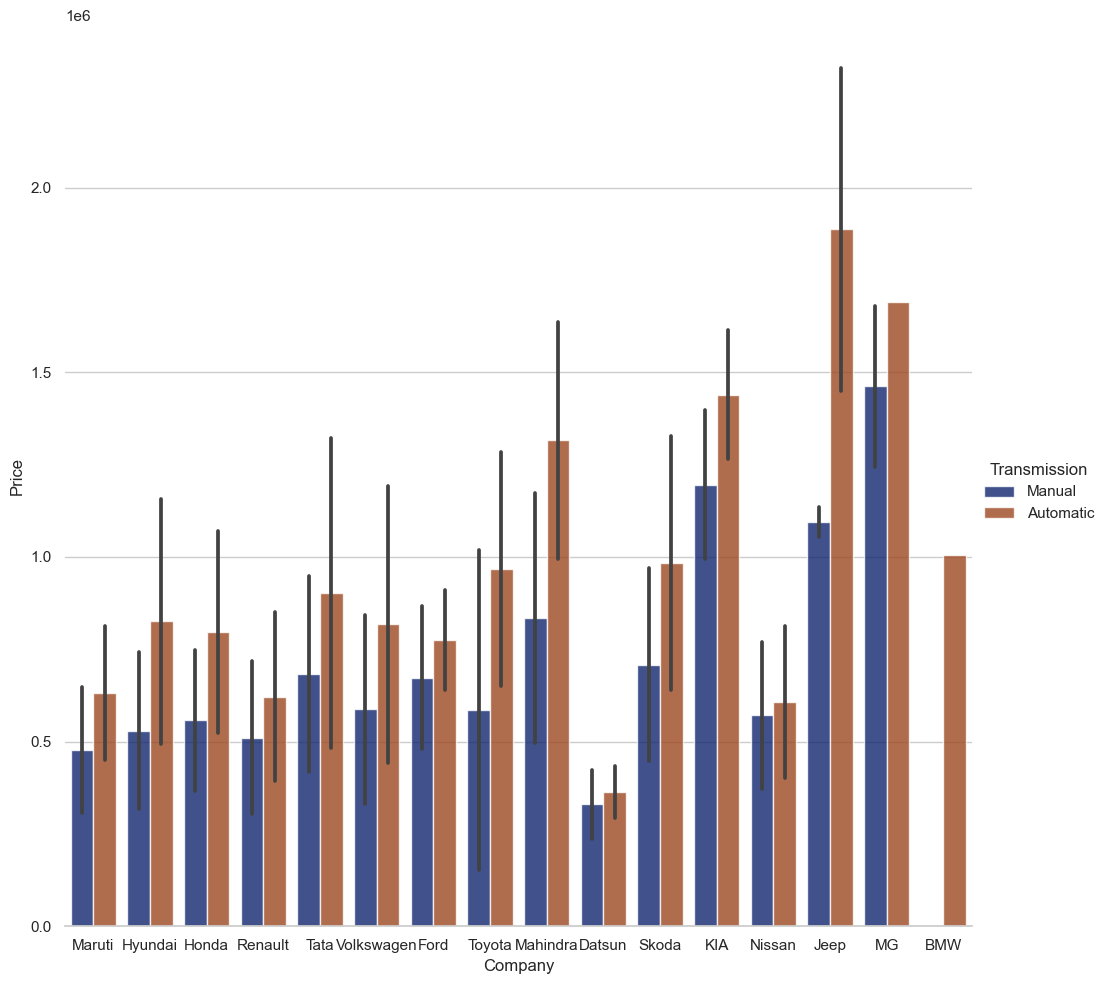

In [50]:
# plt.figure(figsize=(10,10))


sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="Company", y="Price", hue="Transmission",
    errorbar="sd", palette="dark", alpha=.8, height=10
)
g.despine(left=True)
g.set_axis_labels("Company", "Price")
plt.show()

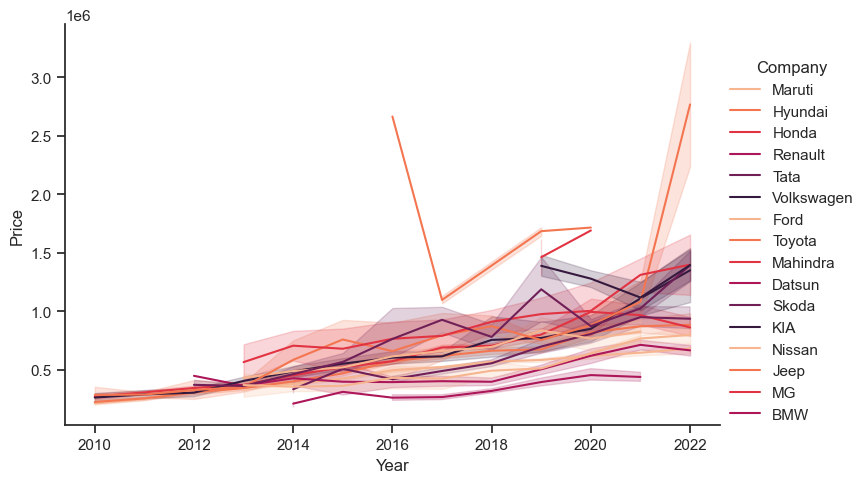

In [51]:


sns.set_theme(style="ticks")

palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=df,
    x="Year", y="Price",
    hue="Company",  
    kind="line",  palette=palette,
    height=5, aspect=1.5, facet_kws=dict(sharex=False),
)

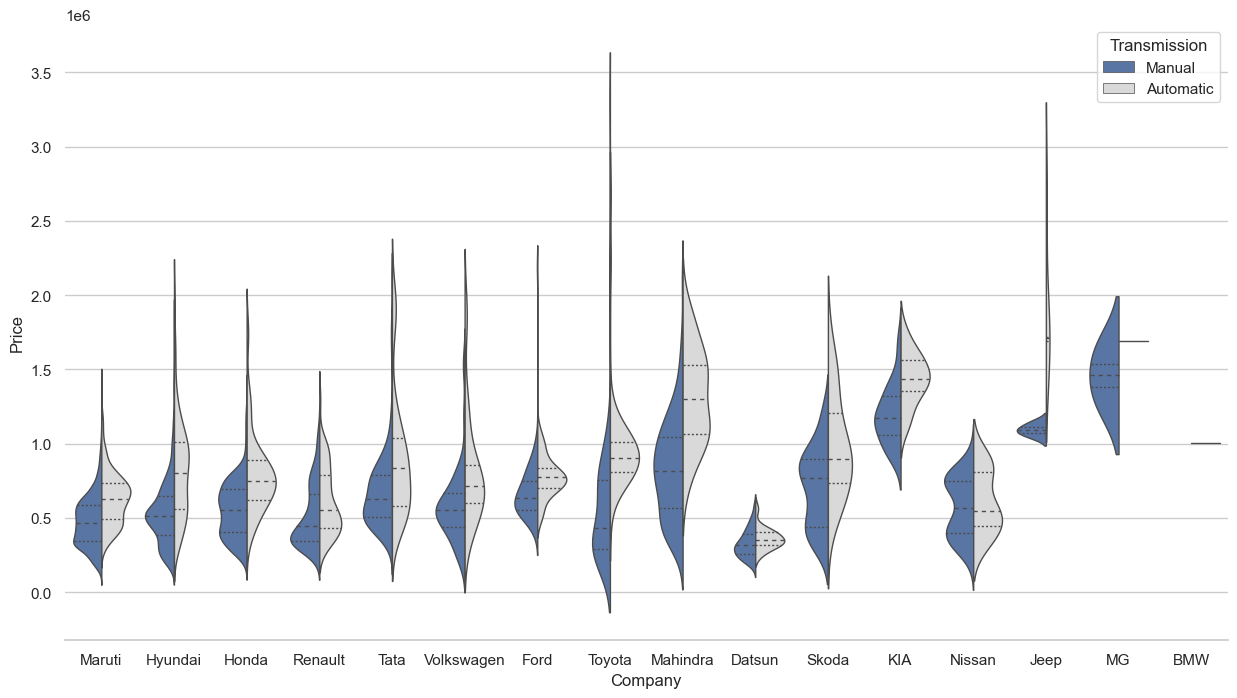

In [52]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")

# Load the example tips dataset

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="Company", y="Price", hue="Transmission",
               split=True, inner="quart", linewidth=1,
               palette={"Manual": "b", "Automatic": ".85"})
sns.despine(left=True)

<Axes: xlabel='Price', ylabel='Count'>

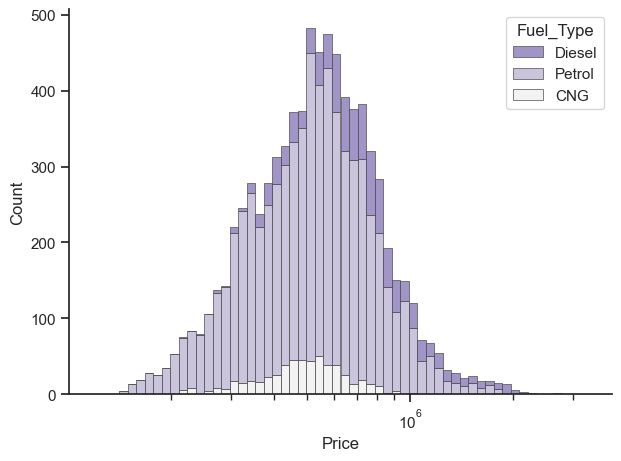

In [54]:
sns.set_theme(style="ticks")


f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="Price", hue="Fuel_Type",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [56]:
df.to_csv('../data/Cars_24.csv', index=None)

In [55]:
for comp in np.sort(df.Company.unique()):
    models = df.loc[df['Company']==comp, 'Model'].unique()
    print(comp)
    print(np.sort(models), end='\n\n')

BMW
['3 Series']

Datsun
['Go' 'Go Plus' 'Redi Go']

Ford
['Ecosport' 'Endeavour' 'FREESTYLE' 'Figo Aspire' 'New Figo']

Honda
['Accord' 'Amaze' 'BR-V' 'Brio' 'CRV' 'City' 'Civic' 'Jazz' 'WR-V']

Hyundai
['ALCAZAR' 'AURA' 'Creta' 'Elite i20' 'Eon' 'GRAND I10 NIOS' 'Grand i10'
 'NEW I20' 'NEW I20 N LINE' 'NEW SANTRO' 'New Elantra' 'Santro Xing'
 'Sonata' 'Tucson New' 'VENUE' 'Verna' 'Xcent' 'i10' 'i20' 'i20 Active']

Jeep
['Compass' 'GRAND CHEROKEE']

KIA
['CARENS' 'SELTOS' 'SONET']

MG
['HECTOR' 'HECTOR PLUS']

Mahindra
['BOLERO NEO' 'Bolero' 'KUV 100 NXT' 'Kuv100' 'MARAZZO' 'Scorpio'
 'TUV 300 PLUS' 'TUV300' 'Thar' 'XUV 3OO' 'XUV500' 'XUV700']

Maruti
['A Star' 'Alto' 'Alto 800' 'Alto K10' 'BREZZA' 'Baleno' 'Celerio'
 'Celerio X' 'Ciaz' 'Dzire' 'Eeco' 'Ertiga' 'IGNIS' 'New Wagon-R' 'OMNI E'
 'Ritz' 'S Cross' 'S PRESSO' 'Swift' 'Swift Dzire' 'Vitara Brezza'
 'Wagon R' 'Wagon R 1.0' 'Wagon R Stingray' 'XL6' 'Zen Estilo']

Nissan
['MAGNITE' 'Micra' 'Micra Active' 'Sunny' 'Terrano']

Rena